### 확률적 경사 하강법

In [3]:
#dataframe 생성
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv')

print(fish)

    Species  Weight  Length  Diagonal   Height   Width
0     Bream   242.0    25.4      30.0  11.5200  4.0200
1     Bream   290.0    26.3      31.2  12.4800  4.3056
2     Bream   340.0    26.5      31.1  12.3778  4.6961
3     Bream   363.0    29.0      33.5  12.7300  4.4555
4     Bream   430.0    29.0      34.0  12.4440  5.1340
..      ...     ...     ...       ...      ...     ...
154   Smelt    12.2    12.2      13.4   2.0904  1.3936
155   Smelt    13.4    12.4      13.5   2.4300  1.2690
156   Smelt    12.2    13.0      13.8   2.2770  1.2558
157   Smelt    19.7    14.3      15.2   2.8728  2.0672
158   Smelt    19.9    15.0      16.2   2.9322  1.8792

[159 rows x 6 columns]


Species 열을 제외한 열들을 입력 데이터로, Species 열을 타깃 데이터로 설정합니다. 

In [5]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

#train set와 test set으로 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
        fish_input, fish_target, random_state = 42)

훈련세트와 테스트세트를 표준화 전처리 해줍니다. 

In [6]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

이제 확률적 경사 하강법을 사용하기 위해 sklearn의 SGDClassifier 클래스를 이용합니다.  
SGDClassifier 클래스에는 loss 변수와 max_iter 변수를 지정하는데  
loss에는 손실 함수의 종류를 지정해주고, max_iter에는 수행할 에포크(epoch)의 횟수를 지정합니다. 

In [7]:
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log', max_iter=10, random_state = 42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/Users/younghyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


점수가 낮기 때문에, epoch 횟수를 늘려서 모델을 다시 만들 수도 있지만,  
확률적 경사 하강법은 점진적인 학습이 가능하기 때문에 모델을 다시 만들지 않고 이어서 더 훈련해보도록 하겠습니다.  
이어서 훈련할 때는 partial_fit() 메서드를 사용하는데, 사용할 때 마다 1 epoch씩 이어서 훈련할 수 있습니다.  

In [8]:
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


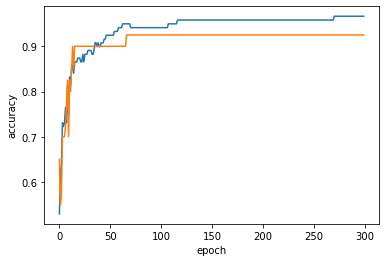

In [10]:
import numpy as np
sc = SGDClassifier(loss='log', random_state = 42)
train_score = []
test_score = []
classes = np.unique(train_target)

#300번의 epoch동안 훈련 반복 진행
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes = classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

#그래프 그리기
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

이 그래프의 경우 약 100번째 epoch 이후로 train set와 test set 사이에 점수차가 커지기 때문에 100번의 epoch가 적절하다고 판단됩니다.  
이제 그럼 반복 횟수를 100번으로 다시 설정하고 모델을 훈련해 보겠습니다.  

In [12]:
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state = 42) 
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925
